# Inspect prediction results from a CNN

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sn
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Input data

In [2]:
instrument = 'isiis'
data_dir = os.path.join('data', instrument)

## Training

In [3]:
output_dir = 'cnn_output'
with open(os.path.join(output_dir, 'train_results.pickle'),'rb') as results_file:
    train_results = pickle.load(results_file)
    
    train_acc = train_results.get('accuracy')
    val_acc = train_results.get('val_accuracy')
    
    train_loss = train_results.get('loss')
    val_loss = train_results.get('val_loss')

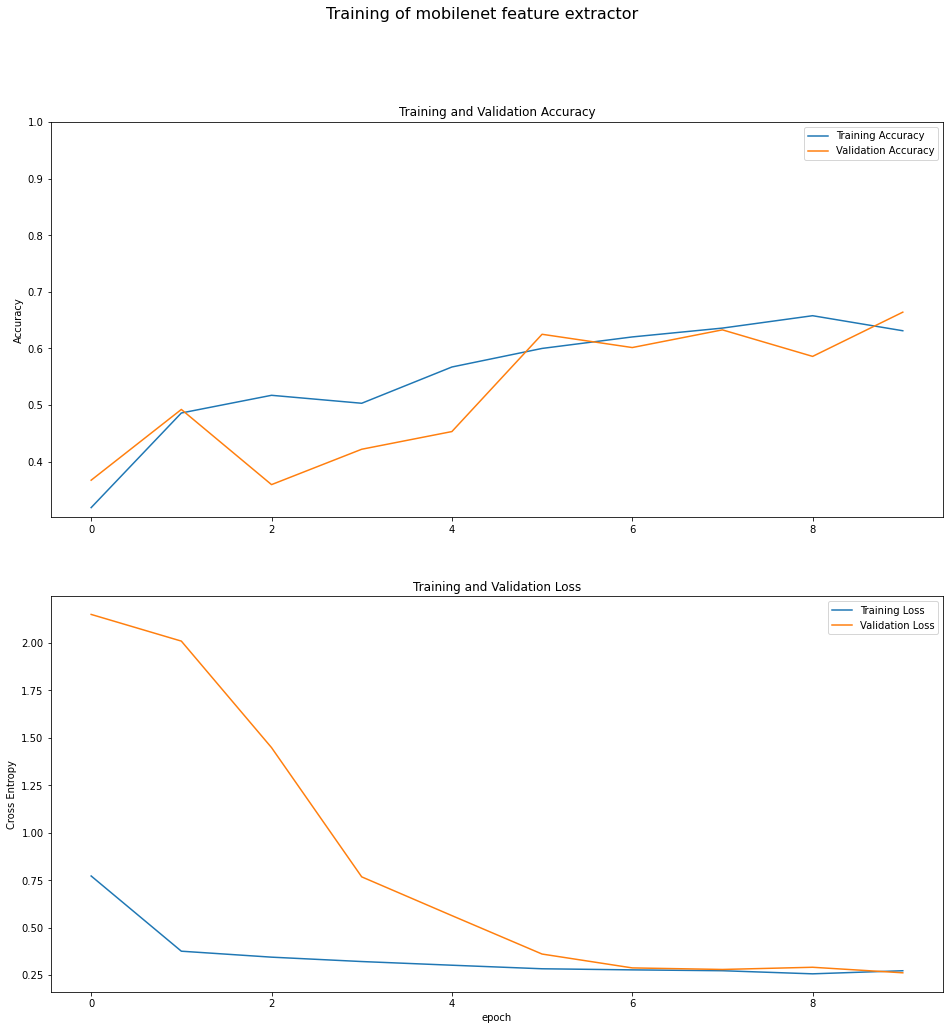

In [4]:
plt.figure(figsize=(16, 16))
plt.subplot(2, 1, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='best')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='best')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.suptitle('Training of mobilenet feature extractor', fontsize=16)
plt.show()

## Testing

### Confusion matrix

Read test file

In [5]:
with open(os.path.join(output_dir, 'test_results.pickle'),'rb') as results_file:
    test_results = pickle.load(results_file)
    
    true_classes = test_results.get('true_classes')
    predicted_classes = test_results.get('predicted_classes')
    classes = test_results.get('classes')

Plot a confusion matrix

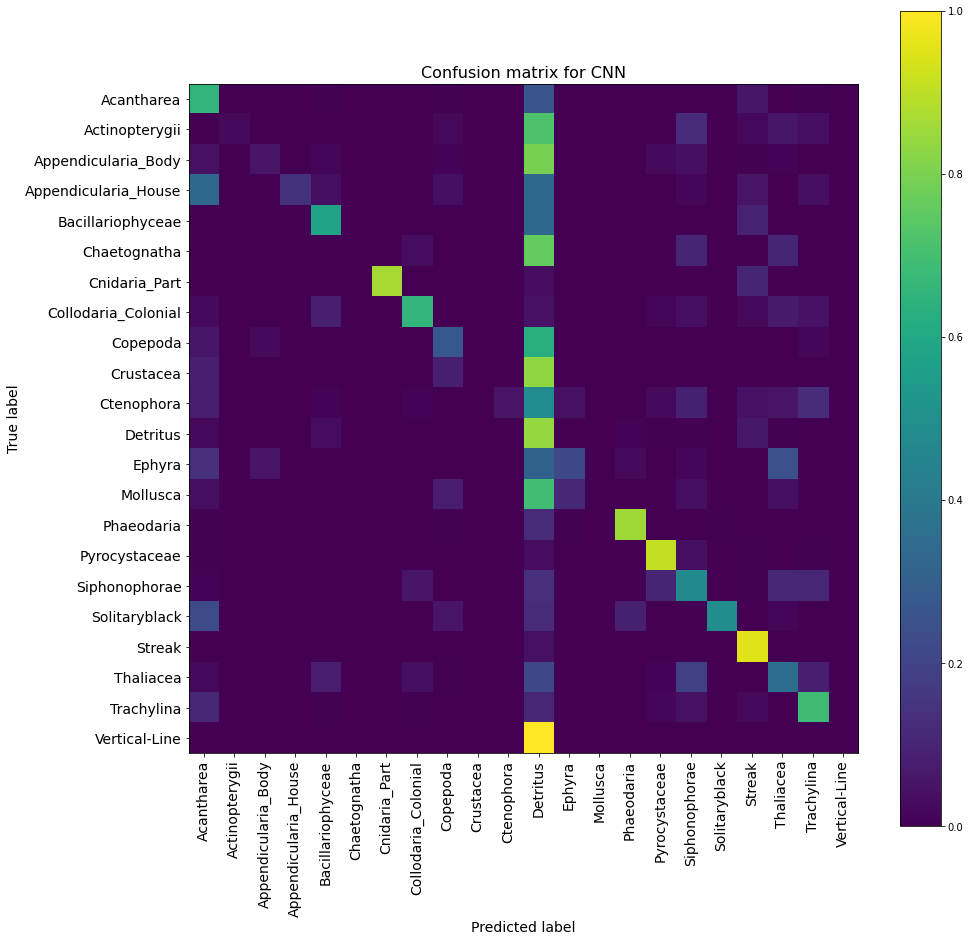

In [6]:
cm = confusion_matrix(true_classes, predicted_classes, normalize='true')
plt.figure(figsize=(15,15))
plt.imshow(cm)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90, fontsize=14)
plt.yticks(tick_marks, classes, fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.title("Confusion matrix for CNN", fontsize=16)
plt.show()

### Classification report

Plot a classification result

/home/tpanaiotis/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


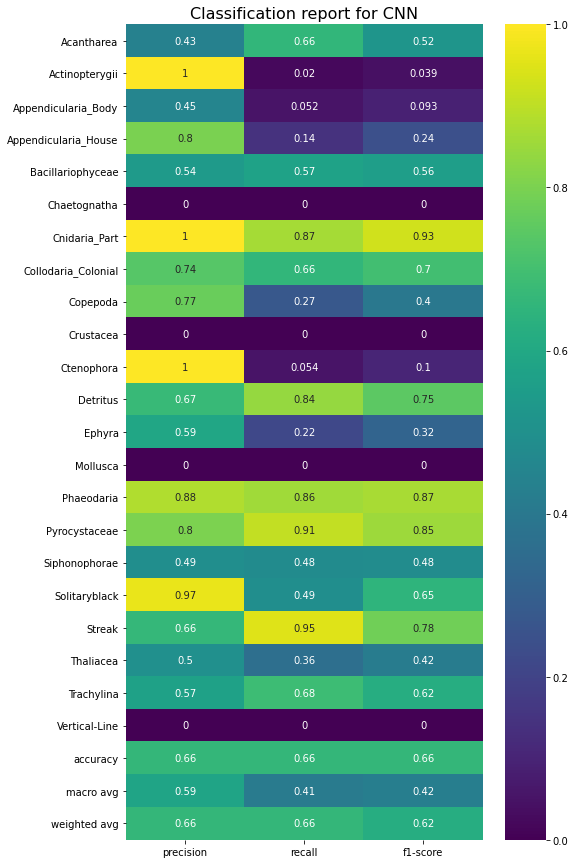

In [7]:
# Create classification report
report = classification_report(true_classes, predicted_classes, output_dict=True)

# List annotations for figure
annot = [str(x) for x in classes]
annot.extend(("accuracy", "macro avg", "weighted avg"))

# Convert report to dataframe
df_report = pd.DataFrame(report).transpose().drop('support', axis=1)

# Plot figure
plt.figure(figsize = (8,15))
sn.heatmap(df_report, annot=True, vmin=0, vmax=1.0,  yticklabels = annot, cmap="viridis")
plt.title("Classification report for CNN", fontsize=16)
plt.show()